In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('train.csv')

In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Why do EDA

- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

In [92]:
# Remember it is an iterative process

### Column Types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

### Univariate Analysis

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


### Age

**conclusions**

- Age is normally(almost) distributed
- 20% of the values are missing
- There are some outliers

In [93]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: ylabel='Frequency'>

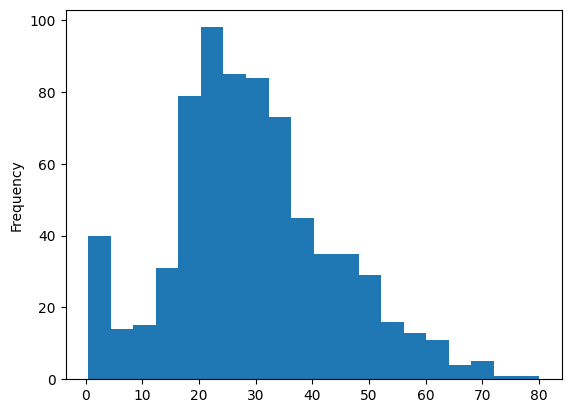

In [94]:
df['Age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

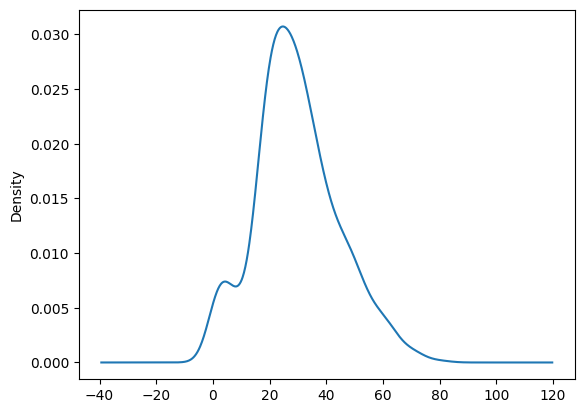

In [95]:
df['Age'].plot(kind='kde') # kde is for distribution

In [96]:
df['Age'].skew()

np.float64(0.38910778230082704)

<Axes: >

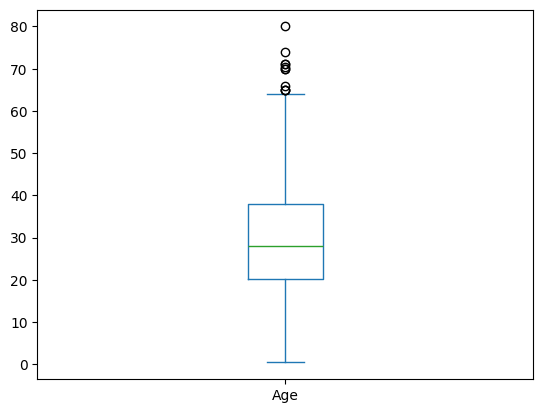

In [97]:
df['Age'].plot(kind='box')

In [98]:
df[df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [99]:
df['Age'].isnull().sum()/len(df['Age'])

np.float64(0.19865319865319866)

### Fare

**conclusions**

- The data is highly(positively) skewed
- Fare col actually contains the group fare and not the individual fare(This migth be and issue)
- We need to create a new col called individual fare

In [100]:
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<Axes: ylabel='Frequency'>

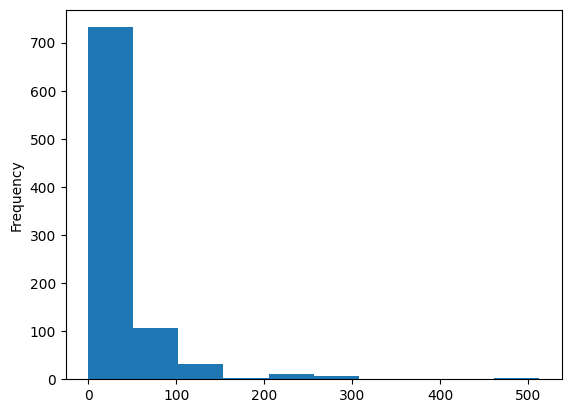

In [101]:
df['Fare'].plot(kind='hist')

<Axes: ylabel='Density'>

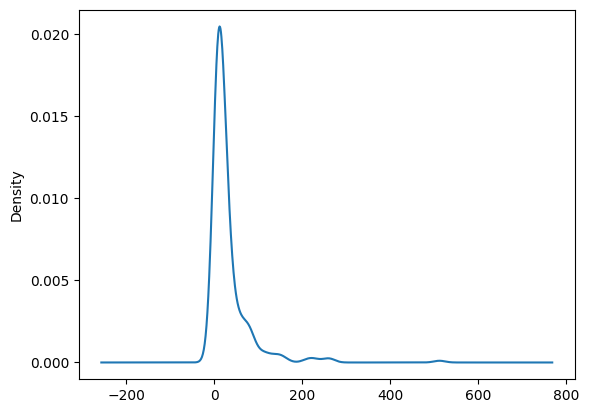

In [102]:
df['Fare'].plot(kind='kde')

In [103]:
df['Fare'].skew()

np.float64(4.787316519674893)

<Axes: >

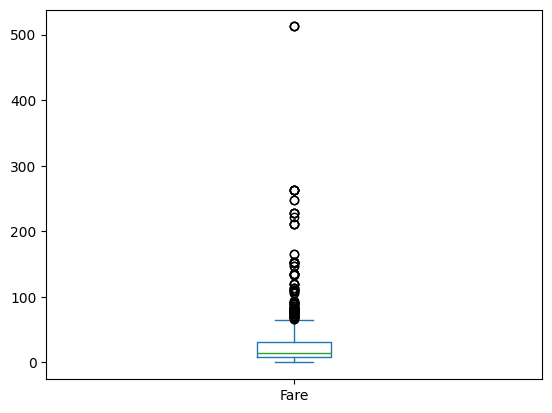

In [104]:
df['Fare'].plot(kind='box')

In [105]:
df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [106]:
df['Fare'].isnull().sum()

np.int64(0)

### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

### Survived

**conclusions**

- 3rd Plcass has most passenger follwed by 1st but surprisingly the count is low for 2nd class
- Parch and SibSp cols can be merged to form  a new col call family_size
- Create a new col called is_alone

In [107]:
df['Embarked'].value_counts()


,count
Embarked,
S,644
C,168
Q,77


<Axes: xlabel='Embarked'>

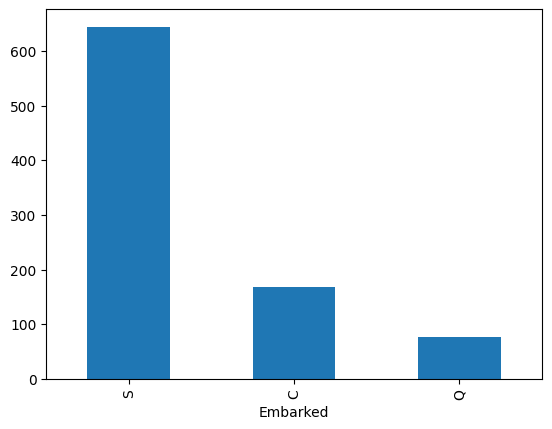

In [108]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

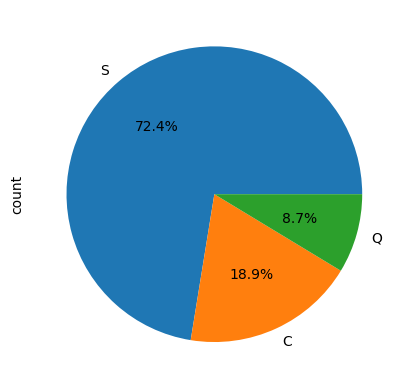

In [109]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

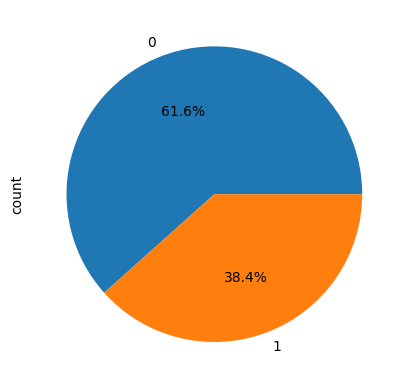

In [110]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [111]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: ylabel='count'>

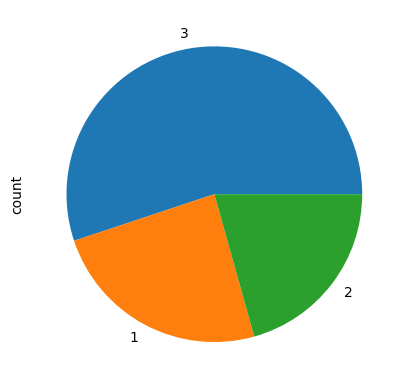

In [112]:
df['Pclass'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

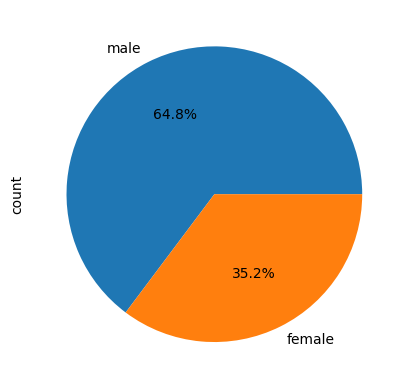

In [113]:
df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

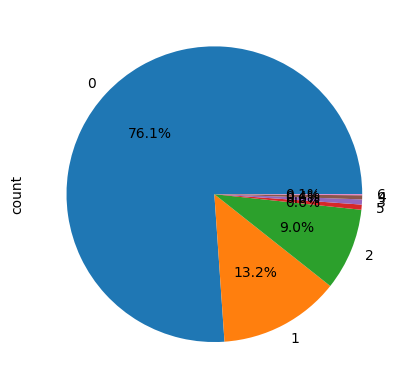

In [114]:
df['Parch'].value_counts().plot(kind='pie', autopct= '%0.1f%%')

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

<Axes: xlabel='Pclass', ylabel='Survived'>

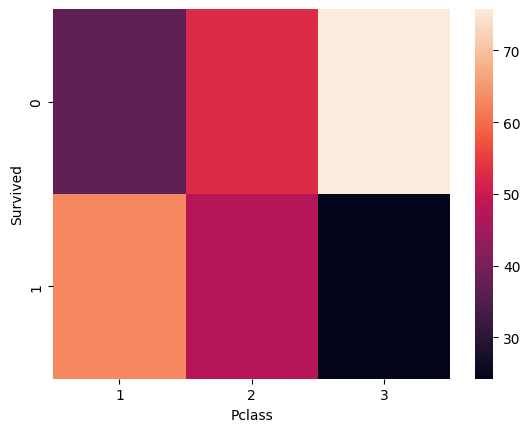

In [115]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

In [116]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [117]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [118]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


In [119]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [120]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [121]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


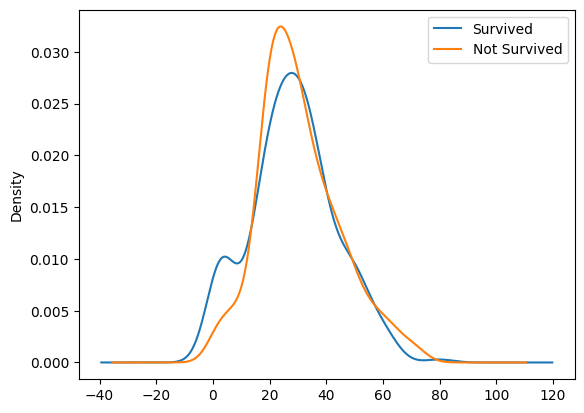

In [122]:
# survived and age

df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

In [123]:
df[df['Pclass'] == 1]['Age'].mean()

np.float64(38.233440860215055)

In [124]:
# Feature Engineering on Fare col

In [125]:
df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [126]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [127]:
df[df['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [128]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [129]:
df1 = pd.read_csv('/content/test.csv')

In [155]:
df=pd.concat([df,df1])

In [156]:
df[df['Ticket'] == 'CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname,title,deck
59,60,0.0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,M,S,5.8625,8.0,large,Goodwin,Master.,M
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,M,S,5.8625,8.0,large,Goodwin,Miss.,M
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,M,S,5.8625,8.0,large,Goodwin,Master.,M
480,481,0.0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,M,S,5.8625,8.0,large,Goodwin,Master.,M
678,679,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,M,S,5.8625,8.0,large,Goodwin,Mrs.,M
683,684,0.0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,M,S,5.8625,8.0,large,Goodwin,Mr.,M
59,60,0.0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN
480,481,0.0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
df['Ticket'].value_counts()

,count
Ticket,
CA. 2343,18
1601,15
CA 2144,14
347082,14
3101295,13
...,...
29107,1
680,1
366713,1


In [158]:
df['individual_fare'] = df['Fare']/(df['SibSp'] + df['Parch'] + 1)

<Axes: >

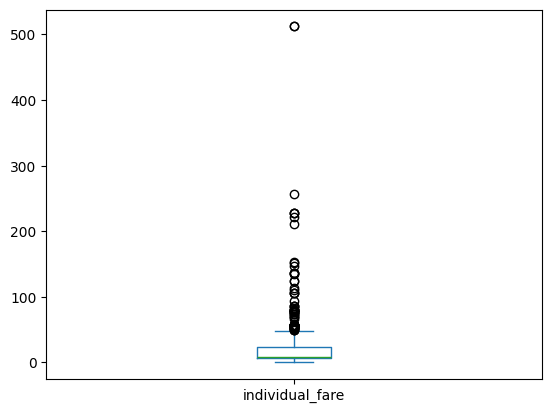

In [133]:
df['individual_fare'].plot(kind='box')

In [134]:
df[['individual_fare','Fare']].describe()

,individual_fare,Fare
count,891.000000,891.000000
mean,19.916375,32.204208
std,35.841257,49.693429
min,0.000000,0.000000
25%,7.250000,7.910400
50%,8.300000,14.454200
75%,23.666667,31.000000
max,512.329200,512.329200


In [135]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [160]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname,title,deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,3.625000,2.0,small,Braund,Mr.,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2.0,small,Cumings,Mrs.,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.925000,1.0,alone,Heikkinen,Miss.,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2.0,small,Futrelle,Mrs.,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,8.050000,1.0,alone,Allen,Mr.,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,NaN,NaN,NaN,NaN,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,NaN,NaN,NaN,NaN,NaN
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,NaN,NaN,NaN,NaN,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,NaN,NaN,NaN,NaN,NaN


In [159]:
# family_type
# 1 -> alone
# 2-4 -> small
# >5 -> large

def transform_family_size(num):

  if num == 1:
    return 'alone'
  elif num>1 and num <5:
    return "small"
  else:
    return "large"

In [161]:
df['family_type'] = df['family_size'].apply(transform_family_size)

In [163]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname,title,deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,3.625000,2.0,small,Braund,Mr.,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2.0,small,Cumings,Mrs.,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.925000,1.0,alone,Heikkinen,Miss.,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2.0,small,Futrelle,Mrs.,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,8.050000,1.0,alone,Allen,Mr.,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,NaN,large,NaN,NaN,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,NaN,large,NaN,NaN,NaN
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,NaN,large,NaN,NaN,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,NaN,large,NaN,NaN,NaN


In [164]:
# bivariate
pd.crosstab(df['Survived'],df['family_type'],normalize='columns')*100

family_type,alone,large,small
Survived,,,
0.0,69.646182,63.064008,42.123288
1.0,30.353818,36.935992,57.876712


In [167]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname,title,deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,3.625000,2.0,small,Braund,Mr.,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2.0,small,Cumings,Mrs.,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.925000,1.0,alone,Heikkinen,Miss.,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2.0,small,Futrelle,Mrs.,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,8.050000,1.0,alone,Allen,Mr.,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,NaN,large,Spector,NaN,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,NaN,large,Oliva y Ocana,NaN,NaN
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,NaN,large,Saether,NaN,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,NaN,large,Ware,NaN,NaN


In [165]:
df['surname'] = df['Name'].str.split(',').str.get(0)

In [166]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname,title,deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,3.625000,2.0,small,Braund,Mr.,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2.0,small,Cumings,Mrs.,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.925000,1.0,alone,Heikkinen,Miss.,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2.0,small,Futrelle,Mrs.,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,8.050000,1.0,alone,Allen,Mr.,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,NaN,large,Spector,NaN,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,NaN,large,Oliva y Ocana,NaN,NaN
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,NaN,large,Saether,NaN,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,NaN,large,Ware,NaN,NaN


In [168]:
df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [170]:
df['title'].value_counts()

,count
title,
Mr.,1274
Miss.,442
Mrs.,322
Master.,101
Dr.,15
Rev.,14
Col.,6
Major.,4
Mlle.,4


In [187]:
temp_df = df[df['title'].isin(['Mr.','Miss.','Mrs.','Master.','ootherr'])]

In [188]:
pd.crosstab(temp_df['Survived'],temp_df['title'],normalize='columns')*100

title,Master.,Miss.,Mr.,Mrs.,ootherr
Survived,,,,,
0.0,42.5,30.21978,84.332689,20.8,50.0
1.0,57.5,69.78022,15.667311,79.2,50.0


In [190]:
df['title'] = df['title'].str.replace('Rev.','other')
df['title'] = df['title'].str.replace('Dr.','other')
df['title'] = df['title'].str.replace('Col.','other')
df['title'] = df['title'].str.replace('Major.','other')
df['title'] = df['title'].str.replace('Capt.','other')
df['title'] = df['title'].str.replace('the','other')
df['title'] = df['title'].str.replace('Jonkheer.','other')
# ,'Dr.','Col.','Major.','Don.','Capt.','the','Jonkheer.']

In [191]:
df['Cabin'].isnull().sum()/len(df['Cabin'])

np.float64(0.0)

In [192]:
df['Cabin'].fillna('M',inplace=True)

<ipython-input-192-f53675b237fc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('M',inplace=True)


In [177]:
df['Cabin'].value_counts()

,count
Cabin,
M,1701
C23 C25 C27,10
G6,9
B96 B98,8
F33,7
...,...
C39,1
B24,1
D40,1


In [193]:
df['deck'] = df['Cabin'].str[0]

In [179]:
df['deck'].value_counts()

,count
deck,
M,1701
C,153
B,112
D,79
E,73
A,37
F,34
G,9
T,2


In [180]:
pd.crosstab(df['deck'],df['Pclass'])

Pclass,1,2,3
deck,,,
A,37,0,0
B,112,0,0
C,153,0,0
D,69,10,0
E,59,8,6
F,0,21,13
G,0,0,9
M,107,422,1172
T,2,0,0


<Axes: xlabel='deck'>

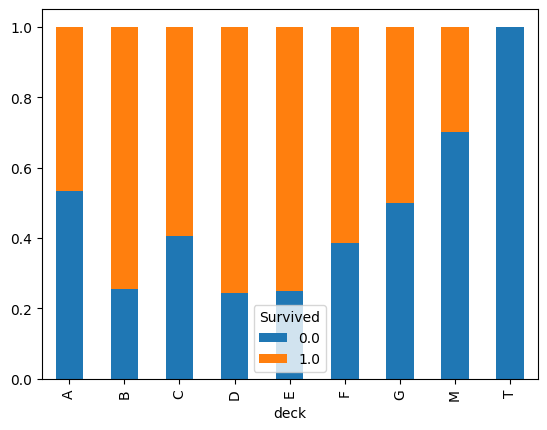

In [181]:
pd.crosstab(df['deck'],df['Survived'],normalize='index').plot(kind='bar',stacked=True)

<Axes: >

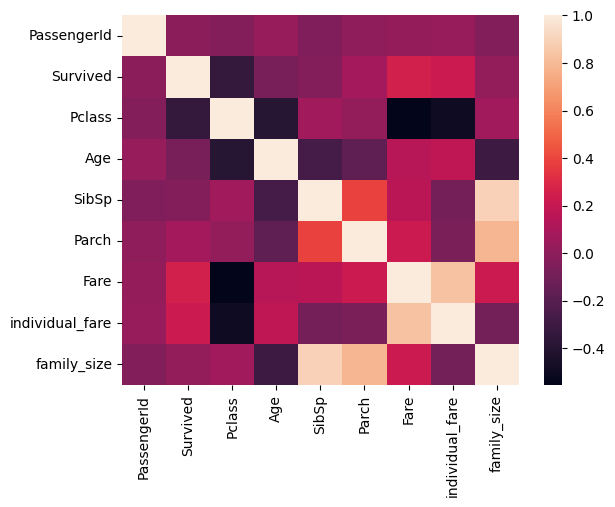

In [199]:

sns.heatmap(df.corr(numeric_only=True))